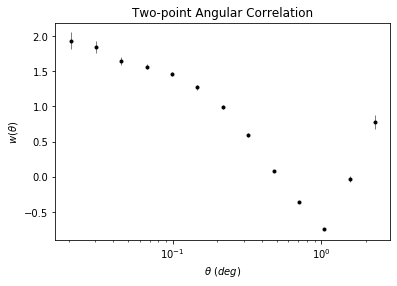

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroML.correlation import bootstrap_two_point_angular

# reading the data from local device
data = pd.read_csv('data.csv')
data = data[(data['r-mag'] > 17) & (data['r-mag'] < 20) & (data['spread_model'] > 0.002)]

def correlation(Nbootstraps):
    np.random.seed(0)
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(6), 16)
    
    results = [bins]
    for D in [data]:
        results += bootstrap_two_point_angular(D['#RA'],D['DEC'],bins = bins,method = 'landy-szalay',Nbootstraps = Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps) = correlation(10)

bin_centers = 0.5 * (bins[1:] + bins[:-1])
corr = r_corr
corr_err = r_corr_err
bootstraps = r_bootstraps

plt.errorbar(bin_centers, r_corr, r_corr_err, fmt='.k', ecolor='gray', lw = 1)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r'$\theta\ (deg)$')
plt.ylabel(r'$w(\theta)$')
plt.title('Two-point Angular Correlation')
plt.show()